<a href="https://colab.research.google.com/github/toheedakhtar/pytorch-deeplearning/blob/main/notebooks/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch computer vision

## 0. Computer vision libraries in pytorch

* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transformers` - function for manipulating vision data to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset for Pytorch.
* `torch.utils.data.DataLoaders` - Creates a Python iterable over a dataset

In [56]:
#torch
import torch
from torch import nn

#torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from `torchvision.datasets`

In [57]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=True, # training true , test false
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=False, # training true , test false
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

In [58]:
len(train_data), len(test_data)

(60000, 10000)

In [59]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [60]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [61]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [62]:
# check shapes
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data


Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

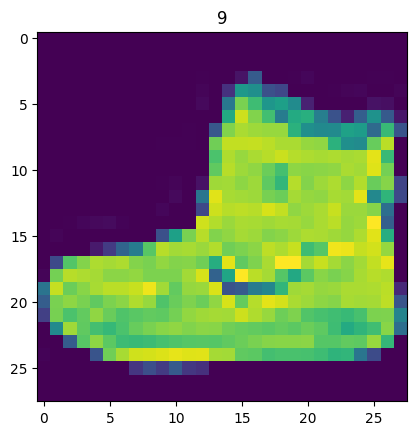

In [63]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze()) # getting rid of 1 color channel. grayscale
plt.title(label)
# image

(-0.5, 27.5, 27.5, -0.5)

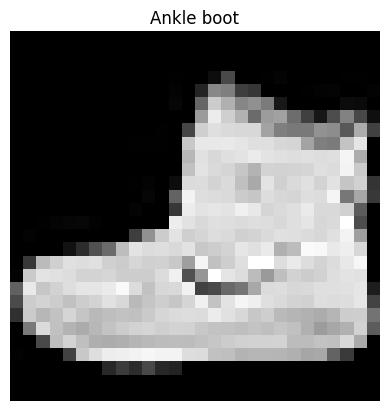

In [64]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

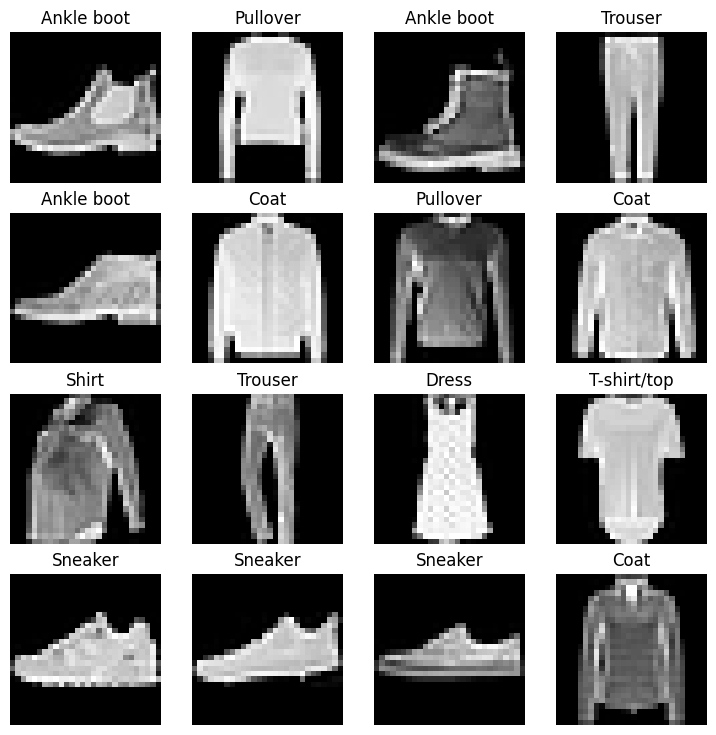

In [65]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

can we do model these with linear lines or we'll need non-linearity?

## Prepare DataLoader

Rght now, our data is in the form of PyTorch Datasets  
DataLoader turns our data into a Python Iterable.  
More specifically, we want to turn our data into batches or mini-batches.  
But Why?  
1. It is more computatinally efficient. can't store a lot of images in memory at same time so we use batches/mini-batches.
2. It gives our neural network more chances ot update its gradients per epoch.


In [66]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [67]:
from torch.utils.data import DataLoader

#hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data, batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data, batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d4ffa9381f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d4ffa57df30>)

In [68]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [69]:
# checking what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [70]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size:  torch.Size([1, 28, 28])


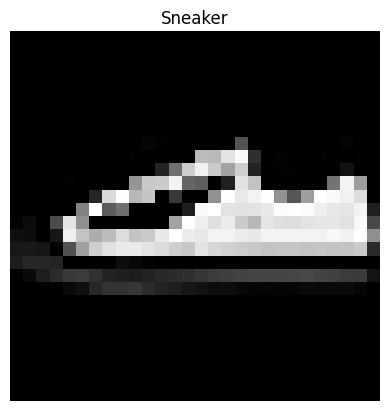

In [71]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print("image size: ", img.shape)

## 3. Model 0 : Build a baseline Model

when starting to build a machine learning modelling experiments,  
its best practice to start with baseline model  

A baseline model is a simple model you will try and improve upon with subsequent mods  

in other words : start simply and add complexity when necessary.

In [72]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x)

# print output
x.shape , output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [73]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int , hidden_units : int,output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
  )

  def forward(self, x):
    return self.layer_stack(x)


In [74]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [75]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

### 3.1 setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multiclass data, our loss function we'll be `nn.CrossEntropyLoss()`
* Optimizer - `nn.optim.SGD()`
* Evaluation metric - accuracy as we are doing classification

In [76]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = ((correct) / len(y_pred)) * 100
  return acc

In [77]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

two main things to track in ml expeiments are :
1. Model's performance (loss and accuracy)
2. How fast it runs

In [78]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device : torch.device = None):
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} sec")
  return total_time

In [79]:
start_time = timer()
end_time=timer()
print_train_time(start_time, end_time )

Train time on None : 0.000 sec


6.430300027204794e-05

### 3.3 Creating a training loop and training model on batches of data

1. Loop through epochs.
2. loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening
5. time it all

In [80]:
# import tqdm for progress
from tqdm.auto import tqdm
# set seed
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# set num of epochs
epochs = 3

# create training and test loops
for epoch in tqdm(range(epochs)):
  print(f"epoch : {epoch}\n----")

  # training
  train_loss = 0

  # add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader): # X - features , y - labels
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    #2. calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulate train loss

    # optimize zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # print what's happeing
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)/len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Tesitng
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)

      #2. calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calc test loss avg per batch

    test_loss /= len(test_dataloader)

    # calc test acc / batch
    test_acc /= len(test_dataloader)

  # print out what happening
  print(f"\n Train loss : {train_loss:.4f} | test_loss : {test_loss:.4f} | Test_acc : {test_acc:.4f}%")

# calc train time
train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0
----
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

 Train loss : 0.5904 | test_loss : 0.5095 | Test_acc : 82.0387%
epoch : 1
----
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

 Train loss : 0.4763 | test_loss : 0.4799 | Test_acc : 83.1969%
epoch : 2
----
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

 Train loss : 0.4550 | test_loss : 0.4766 | Test_acc : 83.4265%
Train time on cpu : 27.243 sec


In [98]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn, device:torch.device = device):

  loss , acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc valuers per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # avg loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name" : model.__class__.__name__, # only works if model was created with class
      "model_loss" : loss.item(),
      "model_acc" : acc
  }

model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device='cpu'
)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [82]:
import torch

In [83]:
!nvidia-smi

Sun Oct 13 12:59:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0              29W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [84]:
torch.cuda.is_available()

True

In [85]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6.1 Building a model with non-linear functions

we learned the power of non-linearity in notebook 02.

In [86]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x : torch.Tensor):
    return self.layer_stack(x)

In [87]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [88]:
# loss func and optimizer
loss_fn = nn.CrossEntropyLoss() # measures how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # update our model parameters to min loss

### 6.2 Functionizing training and evaluation / testing loops

let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [89]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device = device
               ):

  train_loss, train_acc = 0, 0

  # add a loop to loop through training batches
  for batch, (X, y) in enumerate(data_loader): # X - features , y - labels
    model.train()
    # put data on target device
    X,y = X.to(device), y.to(device)
    # 1. forward pass
    y_pred = model(X)
    #2. calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # optimize zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer step
    optimizer.step()

  # divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss : {train_loss:.3f} | Train acc : {train_acc:.2f}%\n")

In [90]:
def test_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      #1. forward pass
      test_pred = model(X_test)
      #2. calculate loss
      test_loss += loss_fn(test_pred, y_test)
      # 3. calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calc test loss avg per batch
    test_loss /= len(data_loader)
    # calc test acc / batch
    test_acc /= len(data_loader)

  # print out what happening
  print(f"test_loss : {test_loss:.3f} | Test_acc : {test_acc:.2f}%\n")



In [91]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_gpu = timer()
epochs = 3

# create optimzation and evaluation loop using train and test functions

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} ------\n")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_stop_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_gpu,
                                            end = train_time_stop_gpu,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ------

Train loss : 1.092 | Train acc : 61.34%

test_loss : 0.956 | Test_acc : 65.00%

Epoch: 1 ------

Train loss : 0.781 | Train acc : 71.93%

test_loss : 0.722 | Test_acc : 73.91%

Epoch: 2 ------

Train loss : 0.670 | Train acc : 75.94%

test_loss : 0.685 | Test_acc : 75.02%

Train time on cuda : 29.183 sec


In [92]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [94]:
total_train_time_on_cpu

27.24342723899963

In [100]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

> **Note:** Sometimes you might find that your model trains faster on CPU than GPU.
> why is this?
> 1. It could be that the overhead for copying data/model to and from GPU outweights the compute benefits offered by the GPU.
> 2. the hardware you're using has a better cpu in terms of compute and capability than GPU